In [1]:
import numpy as np
%matplotlib notebook

import sys
sys.path.append("..")
from simulation.model import ReactionDiffusionModel as rdm
import simulation.animate as animate


In [2]:
# Params
N = 100
dt = 1.0

Du = 0.16
Dv = 0.08
F = 0.04
k = 0.06

n = 2000  # number of steps


In [3]:
# create a model object
model = rdm(N, N, Du, Dv, F, k, dt)


<IPython.core.display.Javascript object>


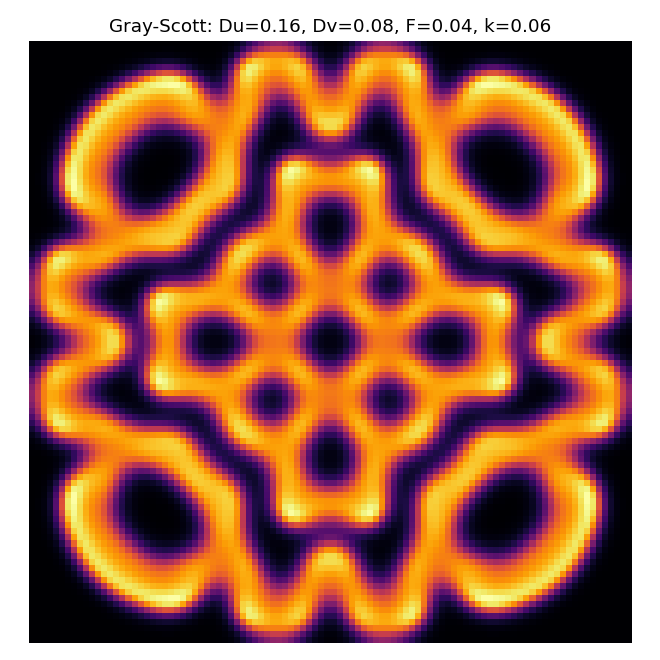

In [4]:
# print a still image of the model
animate.run_simulation(model, n)


<IPython.core.display.Javascript object>


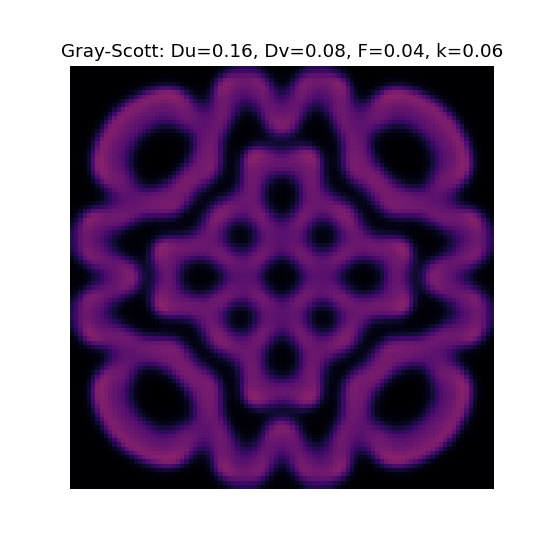

In [5]:
# Animate a model without repeating
_ = animate.run_animation(model, n)

<IPython.core.display.Javascript object>


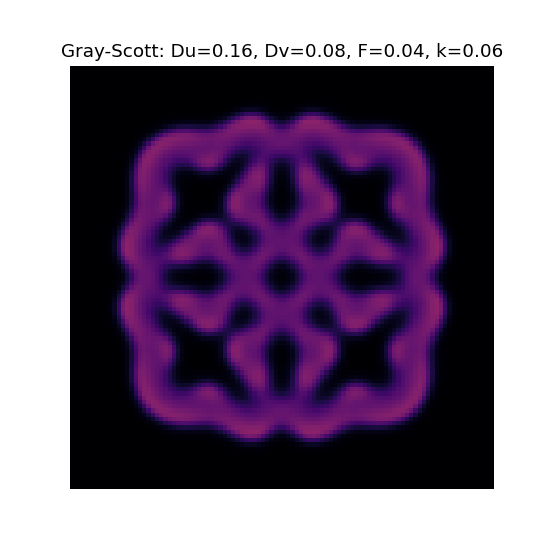

In [6]:
# Animate a model with repeat loop
_ = animate.run_animation(model, n, True)